<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/ethereum2-KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/drive')

%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
drive/  sample_data/


24 attributes


* outgoing_txns	 - outgoing taxes(txn_type = OUT)

* incoming_txns  -  incoming taxes(txn_type = IN)

* total_eth_sent - total of all ether where txn_type = OUT

* avg_eth_sent  = total ether sent/ total no. of transactions of that addr.

* total_usd_sent = total $ sent

* avg_usd_sent	= total $ sent/ total no. of transactions of that addr.

* total_eth_recd	is total ether recieved = total of all ether where (txn_type = IN)

* avg_eth_recd	= total ether recieved/ total no. of transactions of that addr.

* total_usd_recd	= total $ recieved

* avg_usd_recd	= total $ sent/ total no. of transactions of that addr.

* active_months = count of no. of active months

* monthly_outgoing_txns - for outgoing taxes(txn_type = OUT)

* monthly_incoming_txns - for incoming taxes(txn_type = IN)

* monthly_eth_sent - for outgoing taxes(txn_type = OUT)	

* monthly_usd_sent - for outgoing taxes(txn_type = OUT)

* monthly_eth_recd - for incoming taxes(txn_type = IN)

* monthly_usd_recd - for incoming taxes(txn_type = IN)

* contracts_created

* contract_txns_sent	

* incoming_avg_time_btwn_txns	
* incoming_std_time_btwn_txns	
* outgoing_avg_time_btwn_txns	
* outgoing_std_time_btwn_txns	
* num_tokens_used	
* eth_balance

In [3]:
balance = pd.read_csv("/content/drive/My Drive/ethereum/balance.csv", names = ["index",	"Address",	"Balance(in Ether)",	"Ether_value",	"Token(in $)"])
balance.head()


,index,Address,Balance(in Ether),Ether_value,Token(in $)
0,NaN,Address,Balance,Ether_value,Token
1,0.0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,"2,693,158.877369522185465701 Ether","$724,298,148.48 (@ $268.94/ETH)","$43,337.49"
2,1.0,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,"2,201,522.845657376622444548 Ether","$592,077,554.11 (@ $268.94/ETH)","$972,391,367.87"
3,2.0,0x742d35cc6634c0532925a3b844bc454e4438f44e,"2,140,144.987488917500000001 Ether","$575,570,592.94 (@ $268.94/ETH)","$760,226,604.60"
4,3.0,0xdc76cd25977e0a5ae17155770273ad58648900d3,"1,885,860.525755553677093 Ether","$509,201,200.56 (@ $270.01/ETH)","$61,061.89"


In [0]:
# balance1 = pd.read_csv("/content/drive/My Drive/ethereum/balance_data.csv", names = ["index",	"Address",	"Balance(in Ether)",	"Ether_value",	"Token(in $)"])
# balance1.head()

In [5]:
balance.iloc[1]

index                                                         0
Address              0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
Balance(in Ether)            2,693,158.877369522185465701 Ether
Ether_value                     $724,298,148.48 (@ $268.94/ETH)
Token(in $)                                          $43,337.49
Name: 1, dtype: object

In [0]:
# drop the row with column names
balance = balance.drop([0],axis = 0)
balance.reset_index(drop=True, inplace=True)

In [7]:
balance.head()

,index,Address,Balance(in Ether),Ether_value,Token(in $)
0,0.0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,"2,693,158.877369522185465701 Ether","$724,298,148.48 (@ $268.94/ETH)","$43,337.49"
1,1.0,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,"2,201,522.845657376622444548 Ether","$592,077,554.11 (@ $268.94/ETH)","$972,391,367.87"
2,2.0,0x742d35cc6634c0532925a3b844bc454e4438f44e,"2,140,144.987488917500000001 Ether","$575,570,592.94 (@ $268.94/ETH)","$760,226,604.60"
3,3.0,0xdc76cd25977e0a5ae17155770273ad58648900d3,"1,885,860.525755553677093 Ether","$509,201,200.56 (@ $270.01/ETH)","$61,061.89"
4,4.0,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,"1,378,754.144654378911481302 Ether","$372,277,406.60 (@ $270.01/ETH)","$166,680.94"


In [8]:
# no. of instances
len(balance)

6742

In [9]:
# column names
list(balance.columns) 

['index', 'Address', 'Balance(in Ether)', 'Ether_value', 'Token(in $)']

In [0]:
# balance2 = pd.read_csv("/content/drive/My Drive/ethereum/balance_data1.csv", names = ["index",	"Address",	"Balance(in Ether)",	"Ether_value",	"Token(in $)"])
# balance2.head()

In [0]:
# len(balance2)

In [0]:
# list(balance2.columns) 

In [0]:
# # concatenate the two files but make sure that their column names match
# balance = pd.concat([balance1, balance2], ignore_index=True, names = ["index",	"Address",	"Balance(in Ether)",	"Ether_value",	"Token(in $)"])
# balance.head()

In [0]:
# len(balance)

In [0]:
# list(balance.columns) 

Convert to dataframe

In [16]:
balance = pd.DataFrame(balance)
balance.head()

,index,Address,Balance(in Ether),Ether_value,Token(in $)
0,0.0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,"2,693,158.877369522185465701 Ether","$724,298,148.48 (@ $268.94/ETH)","$43,337.49"
1,1.0,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,"2,201,522.845657376622444548 Ether","$592,077,554.11 (@ $268.94/ETH)","$972,391,367.87"
2,2.0,0x742d35cc6634c0532925a3b844bc454e4438f44e,"2,140,144.987488917500000001 Ether","$575,570,592.94 (@ $268.94/ETH)","$760,226,604.60"
3,3.0,0xdc76cd25977e0a5ae17155770273ad58648900d3,"1,885,860.525755553677093 Ether","$509,201,200.56 (@ $270.01/ETH)","$61,061.89"
4,4.0,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,"1,378,754.144654378911481302 Ether","$372,277,406.60 (@ $270.01/ETH)","$166,680.94"


In [0]:
# Remove the first column as it only the index
balance = balance.drop(['index'], axis=1)

In [18]:
balance.head(20)

,Address,Balance(in Ether),Ether_value,Token(in $)
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,"2,693,158.877369522185465701 Ether","$724,298,148.48 (@ $268.94/ETH)","$43,337.49"
1,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,"2,201,522.845657376622444548 Ether","$592,077,554.11 (@ $268.94/ETH)","$972,391,367.87"
2,0x742d35cc6634c0532925a3b844bc454e4438f44e,"2,140,144.987488917500000001 Ether","$575,570,592.94 (@ $268.94/ETH)","$760,226,604.60"
3,0xdc76cd25977e0a5ae17155770273ad58648900d3,"1,885,860.525755553677093 Ether","$509,201,200.56 (@ $270.01/ETH)","$61,061.89"
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,"1,378,754.144654378911481302 Ether","$372,277,406.60 (@ $270.01/ETH)","$166,680.94"
5,0xab7c74abc0c4d48d1bdad5dcb26153fc8780f83e,"999,999.014703265377777771 Ether","$270,009,733.96 (@ $270.01/ETH)","$159,973.57"
6,0xe853c56864a2ebe4576a807d26fdc4a0ada51919,"801,052.799959724594886 Ether","$215,435,140.02 (@ $268.94/ETH)","$337,738.70"
7,0x997114ca0830e9bee7443368fa27f4af2d4e55a6,"789,534.621004200000000001 Ether","$212,337,440.97 (@ $268.94/ETH)",$1.10
8,0x66f820a414680b5bcda5eeca5dea238543f42054,"775,000.574169655945276777 Ether","$208,428,654.42 (@ $268.94/ETH)","$404,372,462.56"
9,0x61edcdf5bb737adffe5043706e7c5bb1f1a56eea,"770,999.002833340000000001 Ether","$207,352,471.82 (@ $268.94/ETH)","$63,545.97"


In [19]:
list(balance.columns) 

['Address', 'Balance(in Ether)', 'Ether_value', 'Token(in $)']

In [0]:
# replace 'Ether' and ',' in the Balance(in Ether) column with '' and convert it to float using to_numeric
balance['Balance(in Ether)'] = balance['Balance(in Ether)'].str.replace('Ether', '') 
balance['Balance(in Ether)'] = pd.to_numeric(balance['Balance(in Ether)'].str.replace(',', ''))

In [0]:
# replace '$' and ',' in the Token(in $) column with '' and convert it to float using to_numeric
balance['Token(in $)'] = balance['Token(in $)'].str.replace('$', '')
balance['Token(in $)'] = pd.to_numeric(balance['Token(in $)'].str.replace(',', ''))

In [22]:
print(balance.dtypes)

Address               object
Balance(in Ether)    float64
Ether_value           object
Token(in $)          float64
dtype: object


In [23]:
balance.head()

,Address,Balance(in Ether),Ether_value,Token(in $)
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.693159e+06,"$724,298,148.48 (@ $268.94/ETH)",4.333749e+04
1,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2.201523e+06,"$592,077,554.11 (@ $268.94/ETH)",9.723914e+08
2,0x742d35cc6634c0532925a3b844bc454e4438f44e,2.140145e+06,"$575,570,592.94 (@ $268.94/ETH)",7.602266e+08
3,0xdc76cd25977e0a5ae17155770273ad58648900d3,1.885861e+06,"$509,201,200.56 (@ $270.01/ETH)",6.106189e+04
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1.378754e+06,"$372,277,406.60 (@ $270.01/ETH)",1.666809e+05


In [0]:
# split the 'Ether_value' column into 2 columns 
balance[['Total Ether_value(in $)','$ per Ether']] = balance["Ether_value"].str.split("(",expand=True)

In [0]:
# Remove the "Ether_value" column as it is not needed anymore
balance = balance.drop(['Ether_value'], axis=1)

In [26]:
balance.head()

,Address,Balance(in Ether),Token(in $),Total Ether_value(in $),$ per Ether
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.693159e+06,4.333749e+04,"$724,298,148.48",@ $268.94/ETH)
1,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2.201523e+06,9.723914e+08,"$592,077,554.11",@ $268.94/ETH)
2,0x742d35cc6634c0532925a3b844bc454e4438f44e,2.140145e+06,7.602266e+08,"$575,570,592.94",@ $268.94/ETH)
3,0xdc76cd25977e0a5ae17155770273ad58648900d3,1.885861e+06,6.106189e+04,"$509,201,200.56",@ $270.01/ETH)
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1.378754e+06,1.666809e+05,"$372,277,406.60",@ $270.01/ETH)


In [0]:

# replace '$' and ',' with '' and convert it to float using to_numeric
balance["Total Ether_value(in $)"] = balance["Total Ether_value(in $)"].str.replace('$','')
balance["Total Ether_value(in $)"] = pd.to_numeric(balance["Total Ether_value(in $)"].str.replace(',',''))

In [0]:
# replace '$','@ ')','/ETH' with '' and convert it to float using to_numeric
balance["$ per Ether"] = balance["$ per Ether"].str.replace('$','')
balance["$ per Ether"] = balance["$ per Ether"].str.replace('@','')
balance["$ per Ether"] = balance["$ per Ether"].str.replace(')','')
balance["$ per Ether"] = pd.to_numeric(balance["$ per Ether"].str.replace("/ETH",""))

In [29]:
balance.head()

,Address,Balance(in Ether),Token(in $),Total Ether_value(in $),$ per Ether
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.693159e+06,4.333749e+04,7.242981e+08,268.94
1,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2.201523e+06,9.723914e+08,5.920776e+08,268.94
2,0x742d35cc6634c0532925a3b844bc454e4438f44e,2.140145e+06,7.602266e+08,5.755706e+08,268.94
3,0xdc76cd25977e0a5ae17155770273ad58648900d3,1.885861e+06,6.106189e+04,5.092012e+08,270.01
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1.378754e+06,1.666809e+05,3.722774e+08,270.01


In [30]:
balance.dtypes

Address                     object
Balance(in Ether)          float64
Token(in $)                float64
Total Ether_value(in $)    float64
$ per Ether                float64
dtype: object

In [31]:

transaction = pd.read_csv("/content/drive/My Drive/ethereum/transaction.csv",names=['Unnamed: 0','Address','Txn_hash','blocks','date','from','txn_type','to','value(in ether)','Txn_fee(in ether)'])
# del transaction["filename"] # remove unwanted column
transaction.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
0,NaN,Address,Txn_hash,blocks,date,from,txn_type,to,value,Txn_fee
1,0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xfc0f500de01a945cae79b8499c0247cf2cd57e791882...,(pending),13/02/2020 08:11,0xadeeb9d09b8bcee10943198fb6f6a4229bab3675,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,111 Ether,(Pending)
2,1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3fc1bfb66bb222580543e38952be03c12944a84bcfbe...,(pending),13/02/2020 05:44,0x4f0a1940de411285ad0455a7f40c81b5e0bc8492,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
3,2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5b324ab8483effd44cd7bfa59bd65725b822d5731221...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
4,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4eede6bc0d21c20fbe32750682ef2ec148bae914a566...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)


In [0]:
transaction = transaction.drop([0],axis = 0)
transaction.reset_index(drop=True, inplace=True)

In [33]:
list(transaction.columns)

['Unnamed: 0',
 'Address',
 'Txn_hash',
 'blocks',
 'date',
 'from',
 'txn_type',
 'to',
 'value(in ether)',
 'Txn_fee(in ether)']

In [34]:
transaction = pd.DataFrame(transaction)
transaction.head()

,Unnamed: 0,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
0,0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xfc0f500de01a945cae79b8499c0247cf2cd57e791882...,(pending),13/02/2020 08:11,0xadeeb9d09b8bcee10943198fb6f6a4229bab3675,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,111 Ether,(Pending)
1,1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3fc1bfb66bb222580543e38952be03c12944a84bcfbe...,(pending),13/02/2020 05:44,0x4f0a1940de411285ad0455a7f40c81b5e0bc8492,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
2,2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5b324ab8483effd44cd7bfa59bd65725b822d5731221...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
3,3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4eede6bc0d21c20fbe32750682ef2ec148bae914a566...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
4,4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x42fe81fda028289414af65fe31405a10289aba37f726...,9473503,13/02/2020 08:10,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,105.0851 Ether,0.00057476


In [35]:
transaction.shape

(82867, 10)

In [0]:
# Remove the first column as it only the index
transaction = transaction.drop(['Unnamed: 0'], axis=1)

In [37]:
list(transaction.columns)

['Address',
 'Txn_hash',
 'blocks',
 'date',
 'from',
 'txn_type',
 'to',
 'value(in ether)',
 'Txn_fee(in ether)']

In [38]:
transaction.head()

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xfc0f500de01a945cae79b8499c0247cf2cd57e791882...,(pending),13/02/2020 08:11,0xadeeb9d09b8bcee10943198fb6f6a4229bab3675,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,111 Ether,(Pending)
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3fc1bfb66bb222580543e38952be03c12944a84bcfbe...,(pending),13/02/2020 05:44,0x4f0a1940de411285ad0455a7f40c81b5e0bc8492,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5b324ab8483effd44cd7bfa59bd65725b822d5731221...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4eede6bc0d21c20fbe32750682ef2ec148bae914a566...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x42fe81fda028289414af65fe31405a10289aba37f726...,9473503,13/02/2020 08:10,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,105.0851 Ether,0.00057476


In [39]:
transaction.head()

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xfc0f500de01a945cae79b8499c0247cf2cd57e791882...,(pending),13/02/2020 08:11,0xadeeb9d09b8bcee10943198fb6f6a4229bab3675,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,111 Ether,(Pending)
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3fc1bfb66bb222580543e38952be03c12944a84bcfbe...,(pending),13/02/2020 05:44,0x4f0a1940de411285ad0455a7f40c81b5e0bc8492,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5b324ab8483effd44cd7bfa59bd65725b822d5731221...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4eede6bc0d21c20fbe32750682ef2ec148bae914a566...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x42fe81fda028289414af65fe31405a10289aba37f726...,9473503,13/02/2020 08:10,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,105.0851 Ether,0.00057476


In [40]:
transaction.shape

(82867, 9)

In [0]:
# rows with "blocks" = "(pending)"
pending_tran = transaction.loc[transaction["blocks"]=="(pending)"]

In [42]:
pending_tran.head()

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xfc0f500de01a945cae79b8499c0247cf2cd57e791882...,(pending),13/02/2020 08:11,0xadeeb9d09b8bcee10943198fb6f6a4229bab3675,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,111 Ether,(Pending)
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x3fc1bfb66bb222580543e38952be03c12944a84bcfbe...,(pending),13/02/2020 05:44,0x4f0a1940de411285ad0455a7f40c81b5e0bc8492,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5b324ab8483effd44cd7bfa59bd65725b822d5731221...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x4eede6bc0d21c20fbe32750682ef2ec148bae914a566...,(pending),07/02/2020 02:12,0x871463ce6b696c0c46910a996070bff9dcc5c351,IN,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0 Ether,(Pending)
417,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,0x64650be669f359522e175b0c478eb832ea1843554ff4...,(pending),13/02/2020 08:13,0xce4694087644b6b6262090c8a08639379f5eaab8,IN,0x4ddc2d193948926d02f9b1fe9e1daa0718270ed5,0 Ether,(Pending)


In [43]:
pending_tran.shape

(159, 9)

In [0]:
# drop rows with "blocks" = "(pending)"
transaction = transaction.drop(pending_tran.index,axis = 0)
transaction.reset_index(drop=True, inplace=True)

In [0]:
# transaction.iloc[417]

In [46]:
transaction.shape

(82708, 9)

In [47]:
transaction.tail()

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
82703,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,0x6664bcf262b928e607d8c302ef1f03515ee670375932...,7197145,09/02/2019 08:57,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,OUT,0x834627f8b83b0237ce3b88a2975f38232d84c6f1,21.8 Ether,0.00021
82704,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,0xc1f38ea1ae52b6896bcd527df17dcdd18c11b07e1590...,7157787,01/02/2019 08:10,0xaa0dec0432f6551e12f4db3714d439212713bcc3,IN,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,21.8 Ether,0.000672
82705,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,0x81b672ea24131f00cd25c03e6dd1f7714c5fc97edee7...,7152799,31/01/2019 07:49,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,OUT,0x834627f8b83b0237ce3b88a2975f38232d84c6f1,19.4 Ether,0.00021
82706,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,0xb8d15319a18a8438704d1427a81d46924ac103de68f1...,7152766,31/01/2019 07:41,0xaa0dec0432f6551e12f4db3714d439212713bcc3,IN,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,17.5 Ether,0.000672
82707,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,0x6b1df86e65725e7c6f308552b09b9956baa87d388fdb...,6731809,19/11/2018 05:37,Upbit 3,IN,0x7b58499f4b106f7620fb49af87a3f1d1347b715b,2 Ether,0.001239


In [48]:
(transaction.loc[transaction["blocks"]=="(pending)"])

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)


In [49]:
(transaction.loc[transaction["blocks"]=="(pending)"]).shape

(0, 9)

In [50]:
(transaction.loc[transaction["Txn_fee(in ether)"]=="(Pending)"])

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)


In [51]:
transaction.shape

(82708, 9)

In [0]:
# replace 'Ether' with '' for 'value' column
transaction['value(in ether)'] = transaction['value(in ether)'].str.replace('Ether', '')

In [53]:
# value attribute contains ','
transaction.iloc[46,:]

Address                     0x742d35cc6634c0532925a3b844bc454e4438f44e
Txn_hash             0xee5fd59cdbe38a5a13c209f459e45f77b180a2b38be5...
blocks                                                         9473460
date                                                  13/02/2020 07:59
from                                                        Bitfinex 5
txn_type                                                           OUT
to                                                          Bitfinex 4
value(in ether)                                                50,000 
Txn_fee(in ether)                                             0.000168
Name: 46, dtype: object

In [0]:
# replace ',' with ''
transaction['value(in ether)'] = transaction['value(in ether)'].str.replace(',', '')

In [55]:
# value attribute contains 'wei'
print(transaction.iloc[174,:])

Address                     0x997114ca0830e9bee7443368fa27f4af2d4e55a6
Txn_hash             0xdd570085f28587501cc42a9bbe7519fc24d241205526...
blocks                                                         9341893
date                                                  24/01/2020 02:54
from                        0xcee95ce42d94b35c4f714f0dc23078ab06136102
txn_type                                                           IN 
to                                                  Plus Token Ponzi 2
value(in ether)                                                  1 wei
Txn_fee(in ether)                                                    0
Name: 174, dtype: object


In [56]:
wei = transaction[transaction['value(in ether)'].str.contains(pat = 'wei') ]
wei

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
174,0x997114ca0830e9bee7443368fa27f4af2d4e55a6,0xdd570085f28587501cc42a9bbe7519fc24d241205526...,9341893,24/01/2020 02:54,0xcee95ce42d94b35c4f714f0dc23078ab06136102,IN,Plus Token Ponzi 2,1 wei,0
531,0xab5801a7d398351b8be11c439e05c5b3259aec9b,0x55827e740d20aba2a8238b7d63c9c416156eef5fda8d...,9451287,09/02/2020 22:27,Vb,OUT,Vb 2,1 wei,0.00042
536,0xab5801a7d398351b8be11c439e05c5b3259aec9b,0x9fe237d0f06e01967c9de0e0615e8a9d19cc428d3d2e...,9222377,05/01/2020 19:47,0x3b0535c602078a22a9954209b3556549c4e5e987,IN,Vb,69 wei,0.00252
729,0x997114ca0830e9bee7443368fa27f4af2d4e55a6,0xdd570085f28587501cc42a9bbe7519fc24d241205526...,9341893,24/01/2020 02:54,0xcee95ce42d94b35c4f714f0dc23078ab06136102,IN,Plus Token Ponzi 2,1 wei,0
1084,0xab5801a7d398351b8be11c439e05c5b3259aec9b,0x55827e740d20aba2a8238b7d63c9c416156eef5fda8d...,9451287,09/02/2020 22:27,Vb,OUT,Vb 2,1 wei,0.00042
...,...,...,...,...,...,...,...,...,...
81225,0x647a979a74c7186c53beb6861abc11fde62d1e0a,0xd1e381caaf458c7a4fa3cd1d992b18251407af807e4a...,3772740,26/05/2017 21:34,0xade9809d9cb0211b904916c636afb83731ba0d77,IN,0x647a979a74c7186c53beb6861abc11fde62d1e0a,1 wei,0.000441
81264,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0x1b1f3e20baa4d930661e76d634c1583e28550d315f63...,9140683,21/12/2019 12:34,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,1 wei,0.000126
81265,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0x95890d980f7f997ce011ddfaf5f808f9377d010d54d0...,9140675,21/12/2019 12:30,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,1 wei,0.000126
81268,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,0xddefb5f57016637a4e414ed6ec2b965a462adc28d483...,9140683,21/12/2019 12:34,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,1 wei,0.000126


In [0]:
# drop rows with value in wei
transaction = transaction.drop(wei.index,axis = 0)
transaction.reset_index(drop=True, inplace=True)

All 83 rows have wei in value column
Wei refers to the smallest denomination of ether (ETH), the currency used on the Ethereum network. For instance, 1 ether (ETH) is equivalent to 1x10^18 wei (which may also be represented in exponential notation: 1e18 wei).

In [58]:
ether = pow(10,18) 
for i in range(len(wei)):
  wei['value(in ether)'].iloc[i] = '{0:.30f}'.format(float(wei['value(in ether)'].iloc[i].split(' ')[0])/ether)
wei

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
174,0x997114ca0830e9bee7443368fa27f4af2d4e55a6,0xdd570085f28587501cc42a9bbe7519fc24d241205526...,9341893,24/01/2020 02:54,0xcee95ce42d94b35c4f714f0dc23078ab06136102,IN,Plus Token Ponzi 2,0.000000000000000001000000000000,0
531,0xab5801a7d398351b8be11c439e05c5b3259aec9b,0x55827e740d20aba2a8238b7d63c9c416156eef5fda8d...,9451287,09/02/2020 22:27,Vb,OUT,Vb 2,0.000000000000000001000000000000,0.00042
536,0xab5801a7d398351b8be11c439e05c5b3259aec9b,0x9fe237d0f06e01967c9de0e0615e8a9d19cc428d3d2e...,9222377,05/01/2020 19:47,0x3b0535c602078a22a9954209b3556549c4e5e987,IN,Vb,0.000000000000000069000000000000,0.00252
729,0x997114ca0830e9bee7443368fa27f4af2d4e55a6,0xdd570085f28587501cc42a9bbe7519fc24d241205526...,9341893,24/01/2020 02:54,0xcee95ce42d94b35c4f714f0dc23078ab06136102,IN,Plus Token Ponzi 2,0.000000000000000001000000000000,0
1084,0xab5801a7d398351b8be11c439e05c5b3259aec9b,0x55827e740d20aba2a8238b7d63c9c416156eef5fda8d...,9451287,09/02/2020 22:27,Vb,OUT,Vb 2,0.000000000000000001000000000000,0.00042
...,...,...,...,...,...,...,...,...,...
81225,0x647a979a74c7186c53beb6861abc11fde62d1e0a,0xd1e381caaf458c7a4fa3cd1d992b18251407af807e4a...,3772740,26/05/2017 21:34,0xade9809d9cb0211b904916c636afb83731ba0d77,IN,0x647a979a74c7186c53beb6861abc11fde62d1e0a,0.000000000000000001000000000000,0.000441
81264,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0x1b1f3e20baa4d930661e76d634c1583e28550d315f63...,9140683,21/12/2019 12:34,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0.000000000000000001000000000000,0.000126
81265,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0x95890d980f7f997ce011ddfaf5f808f9377d010d54d0...,9140675,21/12/2019 12:30,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0.000000000000000001000000000000,0.000126
81268,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,0xddefb5f57016637a4e414ed6ec2b965a462adc28d483...,9140683,21/12/2019 12:34,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,0.000000000000000001000000000000,0.000126


In [59]:
transaction = pd.concat([transaction, wei], ignore_index=True)
transaction.head()

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x42fe81fda028289414af65fe31405a10289aba37f726...,9473503,13/02/2020 08:10,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,105.0851,0.00057476
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0d19386ac886ef8e507267a783144fdeace2f2e25982...,9473495,13/02/2020 08:08,0x8641df2d7c730a8a24db86693fc39f7a74dd4e9d,IN,Wrapped Ether,0,0.000331395
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1db51d64c3dc5cacee3226b72f2eeec62674573b825b...,9473495,13/02/2020 08:08,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,52.8422,0.00057476
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5c7d53d2687c483fd1c7a2956837cd35ae091005fad0...,9473484,13/02/2020 08:06,0xd6afa1ba3a8766212471fb19f62b9dbeafc8e4d3,IN,Wrapped Ether,0,0.00027996
4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7cf7985444fab4413495374c091848690b5205c1c334...,9473477,13/02/2020 08:04,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,97.6113,0.00057476


In [60]:
transaction.shape

(82708, 9)

In [61]:
transaction.tail()

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)
82703,0x647a979a74c7186c53beb6861abc11fde62d1e0a,0xd1e381caaf458c7a4fa3cd1d992b18251407af807e4a...,3772740,26/05/2017 21:34,0xade9809d9cb0211b904916c636afb83731ba0d77,IN,0x647a979a74c7186c53beb6861abc11fde62d1e0a,0.000000000000000001000000000000,0.000441
82704,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0x1b1f3e20baa4d930661e76d634c1583e28550d315f63...,9140683,21/12/2019 12:34,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0.000000000000000001000000000000,0.000126
82705,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0x95890d980f7f997ce011ddfaf5f808f9377d010d54d0...,9140675,21/12/2019 12:30,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0.000000000000000001000000000000,0.000126
82706,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,0xddefb5f57016637a4e414ed6ec2b965a462adc28d483...,9140683,21/12/2019 12:34,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,0.000000000000000001000000000000,0.000126
82707,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,0x656608d020640046719f04395e4ec05fdc383b79cacd...,9140675,21/12/2019 12:30,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,0.000000000000000001000000000000,0.000126


In [62]:
a = transaction[transaction['value(in ether)'].str.contains(pat = '[a-zA-Z]', regex = True) ]
a.index = range(len(a))
a


,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether)


In [0]:
transaction['value(in ether)'] = pd.to_numeric(transaction['value(in ether)'])
transaction['Txn_fee(in ether)'] = pd.to_numeric(transaction['Txn_fee(in ether)'])

In [64]:
transaction.dtypes

Address               object
Txn_hash              object
blocks                object
date                  object
from                  object
txn_type              object
to                    object
value(in ether)      float64
Txn_fee(in ether)    float64
dtype: object

In [0]:
# transaction['date'] =transaction['date'].str

In [66]:
transaction.dtypes

Address               object
Txn_hash              object
blocks                object
date                  object
from                  object
txn_type              object
to                    object
value(in ether)      float64
Txn_fee(in ether)    float64
dtype: object

In [0]:
# split the 'date' column into 2 columns 
transaction[['Date','Time']] = transaction['date'].str.split(" ", n = 1, expand = True)

# n - int, default -1 (all)
# Limit number of splits in output. None, 0 and -1 will be interpreted as return all splits.

# expand - bool, default False
# Expand the splitted strings into separate columns.

In [68]:
transaction.head()

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether),Date,Time
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x42fe81fda028289414af65fe31405a10289aba37f726...,9473503,13/02/2020 08:10,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,105.0851,0.000575,13/02/2020,08:10
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0d19386ac886ef8e507267a783144fdeace2f2e25982...,9473495,13/02/2020 08:08,0x8641df2d7c730a8a24db86693fc39f7a74dd4e9d,IN,Wrapped Ether,0.0000,0.000331,13/02/2020,08:08
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1db51d64c3dc5cacee3226b72f2eeec62674573b825b...,9473495,13/02/2020 08:08,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,52.8422,0.000575,13/02/2020,08:08
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5c7d53d2687c483fd1c7a2956837cd35ae091005fad0...,9473484,13/02/2020 08:06,0xd6afa1ba3a8766212471fb19f62b9dbeafc8e4d3,IN,Wrapped Ether,0.0000,0.000280,13/02/2020,08:06
4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7cf7985444fab4413495374c091848690b5205c1c334...,9473477,13/02/2020 08:04,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,97.6113,0.000575,13/02/2020,08:04


In [0]:
transaction[['Day','Month','Year']] = transaction['Date'].str.split("/", n = 2, expand = True).astype('str')

In [0]:
transaction['Month-Year'] = ''
transaction['Month-Year'] = transaction['Month'].map(str)+" "+transaction['Year'].map(str)

In [0]:
transaction[['Hours','Minutes']] = transaction['Time'].str.split(":", n = 2, expand = True).astype('str')

In [72]:
transaction.head()

,Address,Txn_hash,blocks,date,from,txn_type,to,value(in ether),Txn_fee(in ether),Date,Time,Day,Month,Year,Month-Year,Hours,Minutes
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x42fe81fda028289414af65fe31405a10289aba37f726...,9473503,13/02/2020 08:10,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,105.0851,0.000575,13/02/2020,08:10,13,02,2020,02 2020,08,10
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0d19386ac886ef8e507267a783144fdeace2f2e25982...,9473495,13/02/2020 08:08,0x8641df2d7c730a8a24db86693fc39f7a74dd4e9d,IN,Wrapped Ether,0.0000,0.000331,13/02/2020,08:08,13,02,2020,02 2020,08,08
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1db51d64c3dc5cacee3226b72f2eeec62674573b825b...,9473495,13/02/2020 08:08,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,52.8422,0.000575,13/02/2020,08:08,13,02,2020,02 2020,08,08
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5c7d53d2687c483fd1c7a2956837cd35ae091005fad0...,9473484,13/02/2020 08:06,0xd6afa1ba3a8766212471fb19f62b9dbeafc8e4d3,IN,Wrapped Ether,0.0000,0.000280,13/02/2020,08:06,13,02,2020,02 2020,08,06
4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7cf7985444fab4413495374c091848690b5205c1c334...,9473477,13/02/2020 08:04,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,97.6113,0.000575,13/02/2020,08:04,13,02,2020,02 2020,08,04


In [0]:
transaction = transaction.drop('date',axis=1)
transaction = transaction.drop('Date',axis=1)
transaction = transaction.drop('Time',axis=1)

In [0]:
transaction['Month'] = pd.to_numeric(transaction['Month'])
transaction['Year'] = pd.to_numeric(transaction['Year'])
transaction['Day'] = pd.to_numeric(transaction['Day'])
transaction['Hours'] = pd.to_numeric(transaction['Hours'])
transaction['Minutes'] = pd.to_numeric(transaction['Minutes'])


In [75]:
transaction.head()

,Address,Txn_hash,blocks,from,txn_type,to,value(in ether),Txn_fee(in ether),Day,Month,Year,Month-Year,Hours,Minutes
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x42fe81fda028289414af65fe31405a10289aba37f726...,9473503,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,105.0851,0.000575,13,2,2020,02 2020,8,10
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0d19386ac886ef8e507267a783144fdeace2f2e25982...,9473495,0x8641df2d7c730a8a24db86693fc39f7a74dd4e9d,IN,Wrapped Ether,0.0000,0.000331,13,2,2020,02 2020,8,8
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1db51d64c3dc5cacee3226b72f2eeec62674573b825b...,9473495,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,52.8422,0.000575,13,2,2020,02 2020,8,8
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5c7d53d2687c483fd1c7a2956837cd35ae091005fad0...,9473484,0xd6afa1ba3a8766212471fb19f62b9dbeafc8e4d3,IN,Wrapped Ether,0.0000,0.000280,13,2,2020,02 2020,8,6
4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7cf7985444fab4413495374c091848690b5205c1c334...,9473477,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,97.6113,0.000575,13,2,2020,02 2020,8,4


In [76]:
transaction.dtypes

Address               object
Txn_hash              object
blocks                object
from                  object
txn_type              object
to                    object
value(in ether)      float64
Txn_fee(in ether)    float64
Day                    int64
Month                  int64
Year                   int64
Month-Year            object
Hours                  int64
Minutes                int64
dtype: object

In [77]:
transaction.loc[transaction["txn_type"]=="OUT"]


,Address,Txn_hash,blocks,from,txn_type,to,value(in ether),Txn_fee(in ether),Day,Month,Year,Month-Year,Hours,Minutes
21,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,0xb23b77fb979573b39802111e75cb634736a95dd0fb1b...,9468817,Binance 7,OUT,Binance USD,0.000000e+00,0.000523,12,2,2020,02 2020,14,57
22,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,0x5c67d262ec4eb7edda121d37ee8915a85d1df8f8746a...,9468808,Binance 7,OUT,ChainLink Token,0.000000e+00,0.000465,12,2,2020,02 2020,14,55
23,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,0xff7e2c6b2da701a8f4daec1ce05b8bc8689109d4d04a...,9437041,Binance 7,OUT,Crypto.com: MCO Token,0.000000e+00,0.000422,7,2,2020,02 2020,17,53
24,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,0xd954cae00768b1a0372f59a5ee25d297039a246a7cf4...,9429698,Binance 7,OUT,Binance USD,0.000000e+00,0.000523,6,2,2020,02 2020,14,38
25,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,0xcc7349a90d72b37829bda7b869829bbff58e5f4a46bf...,9429470,Binance 7,OUT,Monetha Token,0.000000e+00,0.000478,6,2,2020,02 2020,13,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81044,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xfd766c6d78b26320e7d12223ab40f1ff93200e16a5fb...,2150626,0xd28c567f1b52119b32a3af6066c36149c2f86d12,OUT,0x168ae36b4386cea14475faa41498a0ea63c67dd7,1.000000e-17,0.000441,27,8,2016,08 2016,18,34
81263,0x168ae36b4386cea14475faa41498a0ea63c67dd7,0xf486840023fa9b31bc3960a8737e36887bbb898a875...,2607141,0x168ae36b4386cea14475faa41498a0ea63c67dd7,OUT,Golem Token,1.000000e-18,2.700000,11,11,2016,11 2016,12,38
81264,0x168ae36b4386cea14475faa41498a0ea63c67dd7,0xc56a31b494464c3069215913b3447145b8adda1516d3...,2598771,0x168ae36b4386cea14475faa41498a0ea63c67dd7,OUT,0x5da9e94410a1241a76dfd182777e5983ae4f7a15,1.000000e-18,0.042544,10,11,2016,11 2016,3,1
82376,0xe9133e7d31845d5f2b66a2618792e869311acf66,0x0ac2c4d8ac567afb18e91e819f38f12f250e551d0bce...,5703282,0xe9133e7d31845d5f2b66a2618792e869311acf66,OUT,0x3c1073ffb746508ebbe69c50cd0729653dce5ed3,1.000000e-18,0.001617,30,5,2018,05 2018,15,25


In [78]:
transaction['txn_type'].iloc[0]

'\xa0IN\xa0'

In [0]:
transaction["txn_type"] = transaction["txn_type"].str.replace('\xa0','')

In [80]:
transaction['txn_type'].iloc[0]

'IN'

In [0]:
addr_group = transaction.groupby('Address')

In [82]:
addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')

,Address,Txn_hash,blocks,from,txn_type,to,value(in ether),Txn_fee(in ether),Day,Month,Year,Month-Year,Hours,Minutes
6851,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xcde3221cad3999de50937f4fe3abcb879ff2ca8f5bc6...,2507282,0x168ae36b4386cea14475faa41498a0ea63c67dd7,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.000000e-14,0.000441,25,10,2016,10 2016,20,44
6852,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0x410a295f9e2b96b73e5c6b741a625aeed80f0fa31607...,2507282,0x168ae36b4386cea14475faa41498a0ea63c67dd7,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.000000e-15,0.000441,25,10,2016,10 2016,20,44
6853,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0x54306a99607f4fee789f57ff1215b640d9c27af104f3...,2505945,Kraken 4,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.839658e+04,0.000651,25,10,2016,10 2016,15,30
6854,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xa27e1213934bbdc703f1c2b124c89389bcb5b3b6311e...,2500407,Kraken 4,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,7.559995e+03,0.000651,24,10,2016,10 2016,17,39
6855,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0x2f9bdb7973ef5caa837974c705a44eeeb1ebc25a2863...,2440811,0xd28c567f1b52119b32a3af6066c36149c2f86d12,OUT,0x95ab2da56c65fcb1b22cfc04ba7b13c0c87e4ae3,5.200000e+01,0.000609,14,10,2016,10 2016,20,52
6856,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xca68e14fa8825690f5311b8c80e5cd6a18248718a069...,2437926,Kraken 4,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,5.300000e+01,0.001302,14,10,2016,10 2016,9,20
6857,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xfd8a191498df7842d8b2605a4f928dbc74e4dca3628e...,2150902,0xd28c567f1b52119b32a3af6066c36149c2f86d12,OUT,0x168ae36b4386cea14475faa41498a0ea63c67dd7,1.000000e-12,0.000441,27,8,2016,08 2016,19,43
6858,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xe88e2c9e0ba5857a1a76898da83a126a4de0f393d78e...,2141124,0xd28c567f1b52119b32a3af6066c36149c2f86d12,OUT,0x168ae36b4386cea14475faa41498a0ea63c67dd7,1.000000e-07,0.000441,26,8,2016,08 2016,4,44
8460,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xcde3221cad3999de50937f4fe3abcb879ff2ca8f5bc6...,2507282,0x168ae36b4386cea14475faa41498a0ea63c67dd7,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.000000e-14,0.000441,25,10,2016,10 2016,20,44
8461,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0x410a295f9e2b96b73e5c6b741a625aeed80f0fa31607...,2507282,0x168ae36b4386cea14475faa41498a0ea63c67dd7,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.000000e-15,0.000441,25,10,2016,10 2016,20,44


In [83]:
addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')[addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')['txn_type']=='IN']

,Address,Txn_hash,blocks,from,txn_type,to,value(in ether),Txn_fee(in ether),Day,Month,Year,Month-Year,Hours,Minutes
6851,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xcde3221cad3999de50937f4fe3abcb879ff2ca8f5bc6...,2507282,0x168ae36b4386cea14475faa41498a0ea63c67dd7,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.000000e-14,0.000441,25,10,2016,10 2016,20,44
6852,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0x410a295f9e2b96b73e5c6b741a625aeed80f0fa31607...,2507282,0x168ae36b4386cea14475faa41498a0ea63c67dd7,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.000000e-15,0.000441,25,10,2016,10 2016,20,44
6853,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0x54306a99607f4fee789f57ff1215b640d9c27af104f3...,2505945,Kraken 4,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.839658e+04,0.000651,25,10,2016,10 2016,15,30
6854,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xa27e1213934bbdc703f1c2b124c89389bcb5b3b6311e...,2500407,Kraken 4,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,7.559995e+03,0.000651,24,10,2016,10 2016,17,39
6856,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xca68e14fa8825690f5311b8c80e5cd6a18248718a069...,2437926,Kraken 4,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,5.300000e+01,0.001302,14,10,2016,10 2016,9,20
8460,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xcde3221cad3999de50937f4fe3abcb879ff2ca8f5bc6...,2507282,0x168ae36b4386cea14475faa41498a0ea63c67dd7,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.000000e-14,0.000441,25,10,2016,10 2016,20,44
8461,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0x410a295f9e2b96b73e5c6b741a625aeed80f0fa31607...,2507282,0x168ae36b4386cea14475faa41498a0ea63c67dd7,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.000000e-15,0.000441,25,10,2016,10 2016,20,44
8462,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0x54306a99607f4fee789f57ff1215b640d9c27af104f3...,2505945,Kraken 4,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,1.839658e+04,0.000651,25,10,2016,10 2016,15,30
8463,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xa27e1213934bbdc703f1c2b124c89389bcb5b3b6311e...,2500407,Kraken 4,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,7.559995e+03,0.000651,24,10,2016,10 2016,17,39
8465,0xd28c567f1b52119b32a3af6066c36149c2f86d12,0xca68e14fa8825690f5311b8c80e5cd6a18248718a069...,2437926,Kraken 4,IN,0xd28c567f1b52119b32a3af6066c36149c2f86d12,5.300000e+01,0.001302,14,10,2016,10 2016,9,20


In [84]:
addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')[addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')['txn_type']=='IN'].dtypes

Address               object
Txn_hash              object
blocks                object
from                  object
txn_type              object
to                    object
value(in ether)      float64
Txn_fee(in ether)    float64
Day                    int64
Month                  int64
Year                   int64
Month-Year            object
Hours                  int64
Minutes                int64
dtype: object

In [85]:
np.sum(addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')[addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')['txn_type']=='IN']['value(in ether)'])

52019.1532

In [86]:
len(addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')[addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')['txn_type']=='IN']['Month'])

42

In [87]:
(addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')[addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')['txn_type']=='IN'][['Month']]).agg(['sum'])

,Month
sum,452


In [88]:
(addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')[addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')['txn_type']=='IN'][['value(in ether)']]).agg(['sum'])

,value(in ether)
sum,52019.1532


In [89]:
addr_group.head()

,Address,Txn_hash,blocks,from,txn_type,to,value(in ether),Txn_fee(in ether),Day,Month,Year,Month-Year,Hours,Minutes
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x42fe81fda028289414af65fe31405a10289aba37f726...,9473503,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,1.050851e+02,0.000575,13,2,2020,02 2020,8,10
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x0d19386ac886ef8e507267a783144fdeace2f2e25982...,9473495,0x8641df2d7c730a8a24db86693fc39f7a74dd4e9d,IN,Wrapped Ether,0.000000e+00,0.000331,13,2,2020,02 2020,8,8
2,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1db51d64c3dc5cacee3226b72f2eeec62674573b825b...,9473495,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,5.284220e+01,0.000575,13,2,2020,02 2020,8,8
3,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x5c7d53d2687c483fd1c7a2956837cd35ae091005fad0...,9473484,0xd6afa1ba3a8766212471fb19f62b9dbeafc8e4d3,IN,Wrapped Ether,0.000000e+00,0.000280,13,2,2020,02 2020,8,6
4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x7cf7985444fab4413495374c091848690b5205c1c334...,9473477,0x6924a03bb710eaf199ab6ac9f2bb148215ae9b5d,IN,Wrapped Ether,9.761130e+01,0.000575,13,2,2020,02 2020,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82700,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,0x2d47ae92bb907d5c405acddb697072dff10cf38d6318...,9140675,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,1.000000e-18,0.000126,21,12,2019,12 2019,12,30
82704,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0x1b1f3e20baa4d930661e76d634c1583e28550d315f63...,9140683,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,1.000000e-18,0.000126,21,12,2019,12 2019,12,34
82705,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,0x95890d980f7f997ce011ddfaf5f808f9377d010d54d0...,9140675,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x1a20a99a9e8d516d431da561a8d7d55fa8f8db6a,1.000000e-18,0.000126,21,12,2019,12 2019,12,30
82706,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,0xddefb5f57016637a4e414ed6ec2b965a462adc28d483...,9140683,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0xe4821efe0e691611e712c9ad09f6ae0d8865ccba,1.000000e-18,0.000126,21,12,2019,12 2019,12,34


In [90]:
addr_group.get_group('0x11d5b065b14f1dc77b3fdd5be321bf5145d68360')

,Address,Txn_hash,blocks,from,txn_type,to,value(in ether),Txn_fee(in ether),Day,Month,Year,Month-Year,Hours,Minutes
79030,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,0x7285a5e762ac7fc52f286fb3dc2ca03e893e2dbadb7e...,8943730,0xb8826388e579367478c1a18fe482fd6e7c77e09d,IN,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,6.500000e+02,0.000315,16,11,2019,11 2019,9,52
79031,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,0x043794b6f49c7440036cbb4a594ac20aa3065c2863b1...,8943671,0xb8826388e579367478c1a18fe482fd6e7c77e09d,IN,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,6.500000e+02,0.000315,16,11,2019,11 2019,9,40
82699,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,0x235c1e07c95979a8cb9e81a238cbbcba08648c5e49e5...,9140683,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,1.000000e-18,0.000126,21,12,2019,12 2019,12,34
82700,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,0x2d47ae92bb907d5c405acddb697072dff10cf38d6318...,9140675,0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90,IN,0x11d5b065b14f1dc77b3fdd5be321bf5145d68360,1.000000e-18,0.000126,21,12,2019,12 2019,12,30


In [91]:
b = addr_group.get_group('0x11d5b065b14f1dc77b3fdd5be321bf5145d68360')
c = b.drop_duplicates(subset=['Year'])
b = b.drop_duplicates(subset=['Year','Month'])
print(b.to_string())
print(c.to_string())
print("b",b.shape,"c=",c.shape)
print("b",b.shape[0],"c=",c.shape[0])

                                          Address                                           Txn_hash   blocks                                        from txn_type                                          to  value(in ether)  Txn_fee(in ether)  Day  Month  Year Month-Year  Hours  Minutes
79030  0x11d5b065b14f1dc77b3fdd5be321bf5145d68360  0x7285a5e762ac7fc52f286fb3dc2ca03e893e2dbadb7e...  8943730  0xb8826388e579367478c1a18fe482fd6e7c77e09d       IN  0x11d5b065b14f1dc77b3fdd5be321bf5145d68360     6.500000e+02           0.000315   16     11  2019    11 2019      9       52
82699  0x11d5b065b14f1dc77b3fdd5be321bf5145d68360  0x235c1e07c95979a8cb9e81a238cbbcba08648c5e49e5...  9140683  0x05b0394e58fc9597d05276f554fcfb3ccfdd0b90       IN  0x11d5b065b14f1dc77b3fdd5be321bf5145d68360     1.000000e-18           0.000126   21     12  2019    12 2019     12       34
                                          Address                                           Txn_hash   blocks                           

In [0]:
dframe = pd.DataFrame(addr_group.groups.keys(),columns=['Address'])

In [93]:
dframe.shape

(6048, 1)

In [94]:
dframe.head()

,Address
0,0x0000000000000000000000000000000000000000
1,0x000000000000000000000000000000000000dead
2,0x0001120c65e60078fef36fe278aad3aa2cddb172
3,0x00018b5e3d3c2f43c1e2ccb15f7b7332b312623e
4,0x0001f74eb4854f9ee81564b6343d612c2c5a691a


In [0]:
dframe['incoming_txns(in ether)'] = 0
dframe['outgoing_txns(in ether)'] = 0
dframe['no. of incoming transaction'] = 0
dframe['no. of outgoing transaction'] = 0
dframe['total_eth_recieved'] = 0
dframe['total_eth_sent'] = 0
dframe['avg_eth_sent'] = 0
dframe['avg_eth_recieved'] = 0
dframe['active months'] = 0
dframe['monthly_outgoing_txns'] = 0

dframe['monthly_incoming_txns'] = 0

dframe['monthly_eth_sent'] = 0
dframe['monthly_usd_sent'] = 0
dframe['monthly_eth_recd'] = 0

dframe['monthly_usd_recd'] = 0
# dframe['incoming_avg_time_btwn_txns'] = 0

# dframe['incoming_std_time_btwn_txns'] = 0
# dframe['outgoing_avg_time_btwn_txns'] = 0
# dframe['outgoing_std_time_btwn_txns'] = 0

In [96]:
len(addr_group.get_group("0x0117ef7fdb2a5814dff83c50fb799741904cd28d")[addr_group.get_group("0x0117ef7fdb2a5814dff83c50fb799741904cd28d")['txn_type']=='IN'])

25

In [0]:
# b = addr_group.get_group('0xd28c567f1b52119b32a3af6066c36149c2f86d12')
# b[b['txn_type']=='IN']
# print((b['Txn_fee(in ether)']).agg(['sum'])['sum'])
# a = 0
# e = b.groupby('Month-Year')
# for key,value in e:
#   print(e.get_group(key)['Txn_fee(in ether)'])
#   print((e.get_group(key)['Txn_fee(in ether)']).agg(['sum']))
#   a +=(e.get_group(key)['Txn_fee(in ether)']).agg(['sum'])['sum']
# print(a)

In [0]:
# 0.000315+ 0.000315

In [99]:
b = addr_group.get_group('0x11d5b065b14f1dc77b3fdd5be321bf5145d68360')
c = b.drop_duplicates(subset=['Year'])
e = b.drop_duplicates(subset=['Year','Month'])

d = (b.drop_duplicates(subset=['Year','Month']).shape[0])/(b.drop_duplicates(subset=['Year']).shape[0])
print("d = ",d) 
print(b.to_string())
print(c.to_string())
print("b",b.shape,"c=",c.shape)
print("b",b.shape[0],"c=",c.shape[0])
print(e.to_string())
print(c.to_string())
print("e",e.shape,"c=",c.shape)
print("e",e.shape[0],"c=",c.shape[0])

d =  2.0
                                          Address                                           Txn_hash   blocks                                        from txn_type                                          to  value(in ether)  Txn_fee(in ether)  Day  Month  Year Month-Year  Hours  Minutes
79030  0x11d5b065b14f1dc77b3fdd5be321bf5145d68360  0x7285a5e762ac7fc52f286fb3dc2ca03e893e2dbadb7e...  8943730  0xb8826388e579367478c1a18fe482fd6e7c77e09d       IN  0x11d5b065b14f1dc77b3fdd5be321bf5145d68360     6.500000e+02           0.000315   16     11  2019    11 2019      9       52
79031  0x11d5b065b14f1dc77b3fdd5be321bf5145d68360  0x043794b6f49c7440036cbb4a594ac20aa3065c2863b1...  8943671  0xb8826388e579367478c1a18fe482fd6e7c77e09d       IN  0x11d5b065b14f1dc77b3fdd5be321bf5145d68360     6.500000e+02           0.000315   16     11  2019    11 2019      9       40
82699  0x11d5b065b14f1dc77b3fdd5be321bf5145d68360  0x235c1e07c95979a8cb9e81a238cbbcba08648c5e49e5...  9140683  0x05b0394e58fc95

# Forming the attributes of the final table

In [100]:
# dframe = pd.DataFrame()
i=0
for addr in dframe['Address']:
  address = addr_group.get_group(addr)
  dframe['no. of incoming transaction'].iloc[i] = len(address[address['txn_type']=='IN'])
  dframe['no. of outgoing transaction'].iloc[i] = len(address[address['txn_type']=='OUT'])
  dframe['incoming_txns(in ether)'].iloc[i] = ((address[address['txn_type']=='IN']['Txn_fee(in ether)']).agg(['sum']))['sum']
  dframe['outgoing_txns(in ether)'].iloc[i] = ((address[address['txn_type']=='OUT']['Txn_fee(in ether)']).agg(['sum']))['sum']
  dframe['total_eth_recieved'].iloc[i] = ((address[address['txn_type']=='IN']['value(in ether)']).agg(['sum']))['sum']
  dframe['total_eth_sent'].iloc[i] = ((address[address['txn_type']=='OUT']['value(in ether)']).agg(['sum']))['sum']
  dframe['avg_eth_sent'].iloc[i] = dframe['total_eth_sent'].iloc[i]/dframe['no. of incoming transaction'].iloc[i]
  dframe['avg_eth_recieved'].iloc[i] = dframe['total_eth_sent'].iloc[i]/dframe['no. of outgoing transaction'].iloc[i]
  dframe['active months'].iloc[i] = (address.drop_duplicates(subset=['Year','Month']).shape[0])/(address.drop_duplicates(subset=['Year']).shape[0])
  dframe['monthly_outgoing_txns'] = dframe['outgoing_txns(in ether)'].iloc[i]/dframe['active months'].iloc[i]
  dframe['monthly_incoming_txns'] = dframe['incoming_txns(in ether)'].iloc[i]/dframe['active months'].iloc[i]
  dframe['monthly_eth_sent'] = dframe['total_eth_sent'].iloc[i]/dframe['active months'].iloc[i]  
  dframe['monthly_eth_recd'] = dframe['total_eth_recieved'].iloc[i]/dframe['active months'].iloc[i]
 
  
  i+=1
  # print(key,((addr_group.get_group(key)['value']).agg(['sum']))['sum'])
print(i)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


6048


In [101]:
dframe.head(20)

,Address,incoming_txns(in ether),outgoing_txns(in ether),no. of incoming transaction,no. of outgoing transaction,total_eth_recieved,total_eth_sent,avg_eth_sent,avg_eth_recieved,active months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd
0,0x0000000000000000000000000000000000000000,0.000965,0.000000,14,0,0.000000,0.000000,0.000000,NaN,1.000000,0.000204,0.000431,8.007742,0,1154.347513,0
1,0x000000000000000000000000000000000000dead,0.003335,0.000000,25,0,0.006702,0.000000,0.000000,NaN,4.000000,0.000204,0.000431,8.007742,0,1154.347513,0
2,0x0001120c65e60078fef36fe278aad3aa2cddb172,0.003003,0.000000,4,0,5000.020000,0.000000,0.000000,NaN,1.000000,0.000204,0.000431,8.007742,0,1154.347513,0
3,0x00018b5e3d3c2f43c1e2ccb15f7b7332b312623e,0.001260,0.000273,1,1,5000.000000,2000.000000,2000.000000,2000.000000,1.000000,0.000204,0.000431,8.007742,0,1154.347513,0
4,0x0001f74eb4854f9ee81564b6343d612c2c5a691a,0.000462,0.000000,1,0,1499.999000,0.000000,0.000000,NaN,1.000000,0.000204,0.000431,8.007742,0,1154.347513,0
5,0x0001fd043311c5942e0e0b11b8e9634f35f73fad,0.000945,0.004599,4,5,5959.998278,2473.840000,618.460000,494.768000,2.000000,0.000204,0.000431,8.007742,0,1154.347513,0
6,0x000904c99936ce282e73d0de21921af294958ab8,0.000231,0.000000,2,0,4758.000000,0.000000,0.000000,NaN,1.000000,0.000204,0.000431,8.007742,0,1154.347513,0
7,0x000e0e5701b14fb77160bcc7bfe7256522d5927b,0.001312,0.009450,3,2,8100.000000,4000.000000,1333.333333,2000.000000,1.000000,0.000204,0.000431,8.007742,0,1154.347513,0
8,0x000f8ef81ef1415a425091fd80215c5b8dfec563,0.004432,0.008633,8,17,5664.329659,3206.100000,400.762500,188.594118,4.333333,0.000204,0.000431,8.007742,0,1154.347513,0
9,0x0012aa4453c184a2e43f3876abf9cc38254d029c,0.005187,0.004373,10,15,8859.907205,9035.461740,903.546174,602.364116,3.333333,0.000204,0.000431,8.007742,0,1154.347513,0


In [102]:
dframe.loc[dframe['Address']=="0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"]

,Address,incoming_txns(in ether),outgoing_txns(in ether),no. of incoming transaction,no. of outgoing transaction,total_eth_recieved,total_eth_sent,avg_eth_sent,avg_eth_recieved,active months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd
4563,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0.012261,0.0,42,0,723.045017,0.0,0.0,NaN,1.0,0.000204,0.000431,8.007742,0,1154.347513,0


In [103]:
balance.loc[balance['Address']=="0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2"]

,Address,Balance(in Ether),Token(in $),Total Ether_value(in $),$ per Ether
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.693159e+06,43337.49,7.242981e+08,268.94


In [104]:
balance.head(10)

,Address,Balance(in Ether),Token(in $),Total Ether_value(in $),$ per Ether
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.693159e+06,4.333749e+04,7.242981e+08,268.94
1,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2.201523e+06,9.723914e+08,5.920776e+08,268.94
2,0x742d35cc6634c0532925a3b844bc454e4438f44e,2.140145e+06,7.602266e+08,5.755706e+08,268.94
3,0xdc76cd25977e0a5ae17155770273ad58648900d3,1.885861e+06,6.106189e+04,5.092012e+08,270.01
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1.378754e+06,1.666809e+05,3.722774e+08,270.01
5,0xab7c74abc0c4d48d1bdad5dcb26153fc8780f83e,9.999990e+05,1.599736e+05,2.700097e+08,270.01
6,0xe853c56864a2ebe4576a807d26fdc4a0ada51919,8.010528e+05,3.377387e+05,2.154351e+08,268.94
7,0x997114ca0830e9bee7443368fa27f4af2d4e55a6,7.895346e+05,1.100000e+00,2.123374e+08,268.94
8,0x66f820a414680b5bcda5eeca5dea238543f42054,7.750006e+05,4.043725e+08,2.084287e+08,268.94
9,0x61edcdf5bb737adffe5043706e7c5bb1f1a56eea,7.709990e+05,6.354597e+04,2.073525e+08,268.94


In [105]:
balance.shape

(6742, 5)

In [106]:
balance.tail()

,Address,Balance(in Ether),Token(in $),Total Ether_value(in $),$ per Ether
6737,NaN,NaN,NaN,NaN,NaN
6738,NaN,NaN,NaN,NaN,NaN
6739,NaN,NaN,NaN,NaN,NaN
6740,NaN,NaN,NaN,NaN,NaN
6741,NaN,NaN,NaN,NaN,NaN


In [107]:
data = pd.merge(balance, dframe, on='Address', how='left')
data.head(20)

,Address,Balance(in Ether),Token(in $),Total Ether_value(in $),$ per Ether,incoming_txns(in ether),outgoing_txns(in ether),no. of incoming transaction,no. of outgoing transaction,total_eth_recieved,total_eth_sent,avg_eth_sent,avg_eth_recieved,active months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.693159e+06,4.333749e+04,7.242981e+08,268.94,0.012261,0.000000,42.0,0.0,7.230450e+02,0.000000e+00,0.000000,NaN,1.00,0.000204,0.000431,8.007742,0.0,1154.347513,0.0
1,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2.201523e+06,9.723914e+08,5.920776e+08,268.94,0.000000,0.013991,0.0,50.0,0.000000e+00,0.000000e+00,NaN,0.000000,2.00,0.000204,0.000431,8.007742,0.0,1154.347513,0.0
2,0x742d35cc6634c0532925a3b844bc454e4438f44e,2.140145e+06,7.602266e+08,5.755706e+08,268.94,0.015120,0.000336,48.0,2.0,2.969222e+04,1.000000e+05,2083.333333,50000.000000,1.00,0.000204,0.000431,8.007742,0.0,1154.347513,0.0
3,0xdc76cd25977e0a5ae17155770273ad58648900d3,1.885861e+06,6.106189e+04,5.092012e+08,270.01,0.036120,0.000000,50.0,0.0,2.400000e+05,0.000000e+00,0.000000,NaN,1.00,0.000204,0.000431,8.007742,0.0,1154.347513,0.0
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1.378754e+06,1.666809e+05,3.722774e+08,270.01,0.008819,0.000000,50.0,0.0,2.122144e+00,0.000000e+00,0.000000,NaN,2.75,0.000204,0.000431,8.007742,0.0,1154.347513,0.0
5,0xab7c74abc0c4d48d1bdad5dcb26153fc8780f83e,9.999990e+05,1.599736e+05,2.700097e+08,270.01,0.007534,0.000000,50.0,0.0,4.480280e-03,0.000000e+00,0.000000,NaN,4.00,0.000204,0.000431,8.007742,0.0,1154.347513,0.0
6,0xe853c56864a2ebe4576a807d26fdc4a0ada51919,8.010528e+05,3.377387e+05,2.154351e+08,268.94,0.000101,0.014729,2.0,48.0,2.000000e-03,2.129148e+02,106.457399,4.435725,2.00,0.000204,0.000431,8.007742,0.0,1154.347513,0.0
7,0x997114ca0830e9bee7443368fa27f4af2d4e55a6,7.895346e+05,1.100000e+00,2.123374e+08,268.94,0.006586,0.000000,34.0,0.0,1.579069e+06,0.000000e+00,0.000000,NaN,1.00,0.000204,0.000431,8.007742,0.0,1154.347513,0.0
8,0x66f820a414680b5bcda5eeca5dea238543f42054,7.750006e+05,4.043725e+08,2.084287e+08,268.94,0.004460,0.034506,14.0,36.0,7.012020e+05,1.751204e+06,125086.000000,48644.555556,5.00,0.000204,0.000431,8.007742,0.0,1154.347513,0.0
9,0x61edcdf5bb737adffe5043706e7c5bb1f1a56eea,7.709990e+05,6.354597e+04,2.073525e+08,268.94,0.012920,0.000000,50.0,0.0,5.646680e-03,0.000000e+00,0.000000,NaN,3.50,0.000204,0.000431,8.007742,0.0,1154.347513,0.0


In [108]:
data.shape

(6742, 20)

In [109]:
data.tail()

,Address,Balance(in Ether),Token(in $),Total Ether_value(in $),$ per Ether,incoming_txns(in ether),outgoing_txns(in ether),no. of incoming transaction,no. of outgoing transaction,total_eth_recieved,total_eth_sent,avg_eth_sent,avg_eth_recieved,active months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd
6737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data['total usd sent'] = data['total_eth_sent'] * data['$ per Ether'] 
data['total usd recieved'] =  data['total_eth_recieved'] * data['$ per Ether']
data['avg usd recieved'] = data['avg_eth_recieved'] * data['$ per Ether'] 
data['avg usd sent'] =  data['avg_eth_sent'] * data['$ per Ether']
data['monthly_usd_sent'] =  data['monthly_eth_sent'] * data['$ per Ether']
data['monthly_usd_recd'] = data['monthly_eth_recd'] * data['$ per Ether'] 

In [111]:
data.head(15)

,Address,Balance(in Ether),Token(in $),Total Ether_value(in $),$ per Ether,incoming_txns(in ether),outgoing_txns(in ether),no. of incoming transaction,no. of outgoing transaction,total_eth_recieved,total_eth_sent,avg_eth_sent,avg_eth_recieved,active months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,total usd sent,total usd recieved,avg usd recieved,avg usd sent
0,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.693159e+06,4.333749e+04,7.242981e+08,268.94,0.012261,0.000000,42.0,0.0,7.230450e+02,0.000000e+00,0.000000,NaN,1.00,0.000204,0.000431,8.007742,2153.602168,1154.347513,310450.220047,0.000000e+00,1.944557e+05,NaN,0.000000e+00
1,0xbe0eb53f46cd790cd13851d5eff43d12404d33e8,2.201523e+06,9.723914e+08,5.920776e+08,268.94,0.000000,0.013991,0.0,50.0,0.000000e+00,0.000000e+00,NaN,0.000000,2.00,0.000204,0.000431,8.007742,2153.602168,1154.347513,310450.220047,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2,0x742d35cc6634c0532925a3b844bc454e4438f44e,2.140145e+06,7.602266e+08,5.755706e+08,268.94,0.015120,0.000336,48.0,2.0,2.969222e+04,1.000000e+05,2083.333333,50000.000000,1.00,0.000204,0.000431,8.007742,2153.602168,1154.347513,310450.220047,2.689400e+07,7.985427e+06,1.344700e+07,5.602917e+05
3,0xdc76cd25977e0a5ae17155770273ad58648900d3,1.885861e+06,6.106189e+04,5.092012e+08,270.01,0.036120,0.000000,50.0,0.0,2.400000e+05,0.000000e+00,0.000000,NaN,1.00,0.000204,0.000431,8.007742,2162.170453,1154.347513,311685.371885,0.000000e+00,6.480241e+07,NaN,0.000000e+00
4,0x53d284357ec70ce289d6d64134dfac8e511c8a3d,1.378754e+06,1.666809e+05,3.722774e+08,270.01,0.008819,0.000000,50.0,0.0,2.122144e+00,0.000000e+00,0.000000,NaN,2.75,0.000204,0.000431,8.007742,2162.170453,1154.347513,311685.371885,0.000000e+00,5.730002e+02,NaN,0.000000e+00
5,0xab7c74abc0c4d48d1bdad5dcb26153fc8780f83e,9.999990e+05,1.599736e+05,2.700097e+08,270.01,0.007534,0.000000,50.0,0.0,4.480280e-03,0.000000e+00,0.000000,NaN,4.00,0.000204,0.000431,8.007742,2162.170453,1154.347513,311685.371885,0.000000e+00,1.209720e+00,NaN,0.000000e+00
6,0xe853c56864a2ebe4576a807d26fdc4a0ada51919,8.010528e+05,3.377387e+05,2.154351e+08,268.94,0.000101,0.014729,2.0,48.0,2.000000e-03,2.129148e+02,106.457399,4.435725,2.00,0.000204,0.000431,8.007742,2153.602168,1154.347513,310450.220047,5.726131e+04,5.378800e-01,1.192944e+03,2.863065e+04
7,0x997114ca0830e9bee7443368fa27f4af2d4e55a6,7.895346e+05,1.100000e+00,2.123374e+08,268.94,0.006586,0.000000,34.0,0.0,1.579069e+06,0.000000e+00,0.000000,NaN,1.00,0.000204,0.000431,8.007742,2153.602168,1154.347513,310450.220047,0.000000e+00,4.246749e+08,NaN,0.000000e+00
8,0x66f820a414680b5bcda5eeca5dea238543f42054,7.750006e+05,4.043725e+08,2.084287e+08,268.94,0.004460,0.034506,14.0,36.0,7.012020e+05,1.751204e+06,125086.000000,48644.555556,5.00,0.000204,0.000431,8.007742,2153.602168,1154.347513,310450.220047,4.709688e+08,1.885813e+08,1.308247e+07,3.364063e+07
9,0x61edcdf5bb737adffe5043706e7c5bb1f1a56eea,7.709990e+05,6.354597e+04,2.073525e+08,268.94,0.012920,0.000000,50.0,0.0,5.646680e-03,0.000000e+00,0.000000,NaN,3.50,0.000204,0.000431,8.007742,2153.602168,1154.347513,310450.220047,0.000000e+00,1.518618e+00,NaN,0.000000e+00


In [0]:
data = data.replace([np.inf, -np.inf], np.nan)

In [113]:
for i in range(len(data.index)) :
    print("Nan in row ", i , " : " ,  data.iloc[i].isnull().sum())

Streaming output truncated to the last 5000 lines.
Nan in row  1743  :  0
Nan in row  1744  :  0
Nan in row  1745  :  2
Nan in row  1746  :  0
Nan in row  1747  :  0
Nan in row  1748  :  0
Nan in row  1749  :  2
Nan in row  1750  :  2
Nan in row  1751  :  2
Nan in row  1752  :  0
Nan in row  1753  :  2
Nan in row  1754  :  0
Nan in row  1755  :  0
Nan in row  1756  :  2
Nan in row  1757  :  2
Nan in row  1758  :  0
Nan in row  1759  :  0
Nan in row  1760  :  0
Nan in row  1761  :  2
Nan in row  1762  :  2
Nan in row  1763  :  2
Nan in row  1764  :  0
Nan in row  1765  :  0
Nan in row  1766  :  0
Nan in row  1767  :  0
Nan in row  1768  :  0
Nan in row  1769  :  0
Nan in row  1770  :  2
Nan in row  1771  :  0
Nan in row  1772  :  2
Nan in row  1773  :  2
Nan in row  1774  :  0
Nan in row  1775  :  0
Nan in row  1776  :  2
Nan in row  1777  :  0
Nan in row  1778  :  2
Nan in row  1779  :  0
Nan in row  1780  :  0
Nan in row  1781  :  0
Nan in row  1782  :  0
Nan in row  1783  :  0
Nan in

In [0]:
values = {'avg_eth_sent':0,'avg_eth_recieved': 0,'avg usd recieved':0,	'avg usd sent':0}
data = data.fillna(value=values)

In [0]:
data = data.fillna(value=0)

In [116]:
data.tail()

,Address,Balance(in Ether),Token(in $),Total Ether_value(in $),$ per Ether,incoming_txns(in ether),outgoing_txns(in ether),no. of incoming transaction,no. of outgoing transaction,total_eth_recieved,total_eth_sent,avg_eth_sent,avg_eth_recieved,active months,monthly_outgoing_txns,monthly_incoming_txns,monthly_eth_sent,monthly_usd_sent,monthly_eth_recd,monthly_usd_recd,total usd sent,total usd recieved,avg usd recieved,avg usd sent
6737,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6738,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6739,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6740,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6741,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
data.shape

(6742, 24)

In [118]:
list(data.columns)


['Address',
 'Balance(in Ether)',
 'Token(in $)',
 'Total Ether_value(in $)',
 '$ per Ether',
 'incoming_txns(in ether)',
 'outgoing_txns(in ether)',
 'no. of incoming transaction',
 'no. of outgoing transaction',
 'total_eth_recieved',
 'total_eth_sent',
 'avg_eth_sent',
 'avg_eth_recieved',
 'active months',
 'monthly_outgoing_txns',
 'monthly_incoming_txns',
 'monthly_eth_sent',
 'monthly_usd_sent',
 'monthly_eth_recd',
 'monthly_usd_recd',
 'total usd sent',
 'total usd recieved',
 'avg usd recieved',
 'avg usd sent']

In [119]:
print(len(list(data.columns)))

24


In [120]:
data.dtypes

Address                         object
Balance(in Ether)              float64
Token(in $)                    float64
Total Ether_value(in $)        float64
$ per Ether                    float64
incoming_txns(in ether)        float64
outgoing_txns(in ether)        float64
no. of incoming transaction    float64
no. of outgoing transaction    float64
total_eth_recieved             float64
total_eth_sent                 float64
avg_eth_sent                   float64
avg_eth_recieved               float64
active months                  float64
monthly_outgoing_txns          float64
monthly_incoming_txns          float64
monthly_eth_sent               float64
monthly_usd_sent               float64
monthly_eth_recd               float64
monthly_usd_recd               float64
total usd sent                 float64
total usd recieved             float64
avg usd recieved               float64
avg usd sent                   float64
dtype: object

Check if values are infinite

In [121]:
data.sum()

Balance(in Ether)              8.679093e+07
Token(in $)                    8.451888e+09
Total Ether_value(in $)        2.305464e+10
$ per Ether                    1.562271e+06
incoming_txns(in ether)        3.135632e+01
outgoing_txns(in ether)        4.682126e+01
no. of incoming transaction    4.623400e+04
no. of outgoing transaction    3.464900e+04
total_eth_recieved             6.410746e+07
total_eth_sent                 2.491011e+07
avg_eth_sent                   4.815246e+06
avg_eth_recieved               2.706625e+06
active months                  1.160392e+04
monthly_outgoing_txns          1.194016e+00
monthly_incoming_txns          2.517133e+00
monthly_eth_sent               4.682127e+04
monthly_usd_sent               1.156433e+07
monthly_eth_recd               6.749470e+06
monthly_usd_recd               1.667043e+09
total usd sent                 6.528526e+09
total usd recieved             1.694947e+10
avg usd recieved               7.041889e+08
avg usd sent                   1

In [0]:
data1 = data.loc[:,'Balance(in Ether)':]

In [0]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [0]:
# [np.array(data['Address']), np.array(data['Balance(in Ether)']), np.array(data['Token(in $)']), np.array(data['Total Ether_value(in $)']), np.array(data['$ per Ether']), np.array(data['incoming_txns(in ether)']), np.array(data['outgoing_txns(in ether)']), np.array(data['no. of incoming transaction']), np.array(data['no. of outgoing transaction']), np.array(data['total_eth_recieved']), np.array(data['total_eth_sent']), np.array(data['avg_eth_sent']), np.array(data['avg_eth_recieved']), np.array(data['active months']), np.array(data['monthly_outgoing_txns']), np.array(data['monthly_incoming_txns']), np.array(data['monthly_eth_sent']), np.array(data['monthly_usd_sent']), np.array(data['monthly_eth_recd']), np.array(data['monthly_usd_recd']), np.array(data['total usd sent']), np.array(data['total usd recieved']), np.array(data['avg usd recieved']), np.array(data['avg usd sent']

In [0]:
x1 = (np.array(data['Balance(in Ether)']), np.array(data['Token(in $)']), np.array(data['Total Ether_value(in $)']), np.array(data['$ per Ether']), np.array(data['incoming_txns(in ether)']), np.array(data['outgoing_txns(in ether)']), np.array(data['no. of incoming transaction']), np.array(data['no. of outgoing transaction']), np.array(data['total_eth_recieved']), np.array(data['total_eth_sent']), np.array(data['avg_eth_sent']), np.array(data['avg_eth_recieved']), np.array(data['active months']), np.array(data['monthly_outgoing_txns']), np.array(data['monthly_incoming_txns']), np.array(data['monthly_eth_sent']), np.array(data['monthly_usd_sent']), np.array(data['monthly_eth_recd']), np.array(data['monthly_usd_recd']), np.array(data['total usd sent']), np.array(data['total usd recieved']), np.array(data['avg usd recieved']), np.array(data['avg usd sent']))
 
x = np.column_stack(x1)

In [161]:
x

array([[2.69315888e+06, 4.33374900e+04, 7.24298148e+08, ...,
        1.94455727e+05, 0.00000000e+00, 0.00000000e+00],
       [2.20152285e+06, 9.72391368e+08, 5.92077554e+08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.14014499e+06, 7.60226605e+08, 5.75570593e+08, ...,
        7.98542698e+06, 1.34470000e+07, 5.60291667e+05],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [0]:
sc = StandardScaler()
X = sc.fit_transform(x)

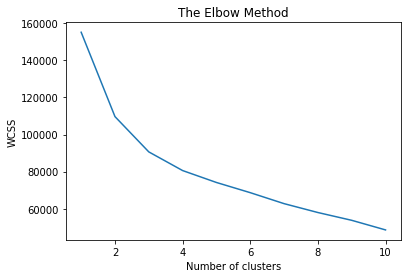

In [163]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [0]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

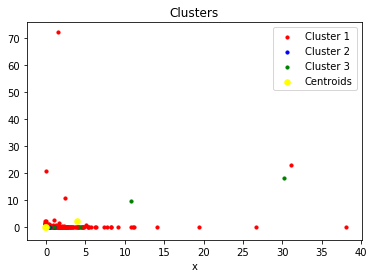

In [165]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('x')
plt.legend()
plt.show()

In [0]:
from sklearn import cluster
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler, PowerTransformer, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import random
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import time
from sklearn.manifold import TSNE

In [0]:
def data_pipeline(df):
    #strip address column
    data = df.iloc[:,1:]
    log = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=True)
    scale = StandardScaler()
    pca =PCA(n_components=data.shape[1])
    

    #build pipeline
    pipe = Pipeline([('log', log ),
                     ('scale', scale ),
                     ('PCA', pca)])

    results = pipe.fit_transform(data)
    return pipe, results

def cluster(results, n_clusters):
    cl = KMeans(n_clusters, n_init=20, max_iter=500,n_jobs=-1, verbose=0)
    return cl.fit(results)
    
    

def assign_cluster_to_data(df, dflabel, cl):
    lbls = []
    addrs = list(df['address'].values)
    for i, row in dflabel.iterrows():
        addr = row['address']
        if row['address'] in addrs:
            lbls.append(addrs.index(row['address']))
        else:
            lbls.append(False)

    dflabel['cluster'] = [cl.labels_[i] for i in lbls]
    return None

def calc_tsne(results, n_components=2, perplexity=40, n_iter=300,verbose=1):
    '''
    Calculated tsne for dataset'''
    time_start = time.time()
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=n_iter,verbose=verbose,learning_rate=100)
    tsne_results = tsne.fit_transform(results)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    return tsne_results


def plot_tsne(cl, tsne_results ):
    '''
    plot'''
    
    NUM_COLORS = cl.n_clusters
    cm = plt.get_cmap('nipy_spectral')

    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111)
    ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])


    for c in np.unique(cl.labels_):
        mask = cl.labels_==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c
        plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=20, alpha=.4,label=lbl)

    leg = plt.legend(bbox_to_anchor=(1, 1))
    for lh in leg.legendHandles: 
        lh.set_alpha(1)




    plt.title('T-SNE', fontsize=20)
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')
    plt.show()
    
    
def find_category_of_cluster(cl,dflabel, category="Exchange"):
    #assign cluster number with the most exchanges
    type_cluster = 0
    num_of_type = 0
    lbl_density=0
    print(category)
    for clust in np.unique(cl.labels_):
        size_of_cluster = np.sum(cl.labels_==clust)
        
        
        mask = dflabel['cluster']==clust
        d = dflabel[mask]
        num = np.sum(d['category']==category)
        density = num / size_of_cluster
        if num > num_of_type:
            lbl_density=density
            num_of_type = num
            type_cluster = clust
        print('cluster number   {}   number of type found: {}    cluster size: {}   label density: {}'.format(clust,num,size_of_cluster,density))
    return type_cluster

def plot_tsne_with_labels(tsne_results,df, dflabel,categs,colors):
    #need to mask df based on which results were kept from the reclustering
    
    labeled_addresses = dflabel['address'].values
    labelmask = np.array([addr in labeled_addresses for addr in df['address'] ] )
    #helper function for category mask
    def cat(addr, labeled_addresses, dflabel):
        if addr not in labeled_addresses:
            return False
        else:
            idx = int(np.where(labeled_addresses==addr)[0][0])
            return dflabel['category'][idx]

    subset, not_subset  = tsne_results[labelmask] , tsne_results[~labelmask]
    fig = plt.figure(figsize=(15,12))
    #not labelled points
    plt.scatter(not_subset[:,0], not_subset[:,1], s=20, c='gray', alpha=.05)

    #categories
    cats = np.array([cat(addr, labeled_addresses, dflabel) for addr in df['address']])#[address_mask] ]) #added address mask for all clusters

    # # #labelled points

    # ax = fig.add_subplot(111)
    # ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

    for c in list(dflabel['category'].unique()):
        mask = dflabel['category']==c
        if np.sum(mask) <1:
            lbl = '_nolegend_'
        else:
            lbl = c

        #category mask
        catmask = cats == c

        if c in categs:
            idx=categs.index(c)
            color = colors[idx]

            plt.scatter(tsne_results[(labelmask & catmask)][:,0], tsne_results[(labelmask & catmask)][:,1], s=100,c=color, alpha=1,label=lbl)

    leg = plt.legend(bbox_to_anchor=(1, 1))
    for lh in leg.legendHandles: 
        lh.set_alpha(1)

    plt.title('T-SNE', fontsize=20)
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')
    plt.show()


def plot_tsne_with_labeled_clusters(tsne_results, cl, clusters, categs, colors):
    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(111)


    for c in np.unique(cl.labels_):
        mask = cl.labels_==c

        if c in clusters:
            idx = clusters.index(c)
            lbl = categs[idx]
            color = colors[idx]

            plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=100,c=color,alpha=.4,label=('Cluster {} - "{}" '.format(c,lbl) ))
        else:
             plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], c='gray',s=20, alpha=.1)

    leg = plt.legend(bbox_to_anchor=(1, 1))
    for lh in leg.legendHandles: 
        lh.set_alpha(1)




    plt.title('T-SNE', fontsize=20)
    plt.xlabel('first principal component')
    plt.ylabel('second principal component')
    plt.show()
    
def recluster(df, cl, clusters, n_clusters):
    lbls = cl.labels_
    mask = np.array([False for i in range(len(lbls))])
    for c in clusters:
        mask |= lbls==c
    subpipe, results = data_pipeline(df[mask])
    subcl = cluster(results, n_clusters)
    return subpipe, subcl, results, df[mask]

def plot_all(tsne_results,cl,df,dflabel,clusters,categs,colors ):
    plot_tsne(cl, tsne_results)
    plot_tsne_with_labeled_clusters(tsne_results, cl, clusters, categs, colors)
    plot_tsne_with_labels(tsne_results,df, dflabel,categs,colors)


In [142]:
data1.shape

(6742, 23)

In [0]:
# pipe, results = data_pipeline(data1)

In [0]:
# cl = cluster(results, n_clusters=8)

In [0]:
# assign_cluster_to_data(data, datalabel, cl)

In [0]:
#number of PCA features is full reconstruction, for now
# num_features = data.shape[1]
num_clusters = 4
num_features = 23

In [0]:
scale = StandardScaler()
pca =PCA(n_components=num_features)
cl = KMeans(num_clusters)
#build pipeline
pipe = Pipeline([('scale', scale ),
                 ('PCA', pca)])

results = pipe.fit_transform(data1)

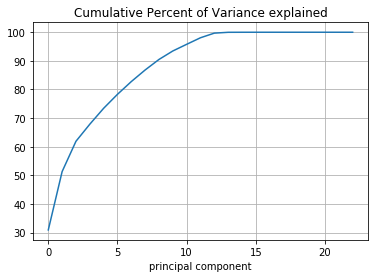

In [146]:

#percent of variance explained by each component

plt.plot(np.arange(pca.n_components_) ,np.cumsum(pca.explained_variance_ratio_)*100)
plt.grid(b=True)
plt.xlabel('principal component')
plt.title('Cumulative Percent of Variance explained')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

Text(0.5, 1.0, 'Calinski Harabaz Scores')

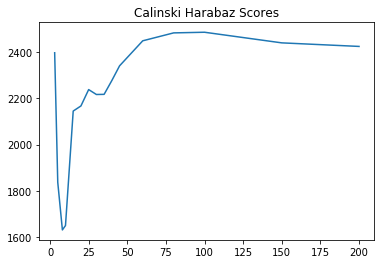

In [147]:
#scoring metric?
from sklearn.metrics import calinski_harabaz_score as ch_score
clusters = [3,5,8,10,15,20,25,30,35,40,45,60,80,100,150,200]
scores = []
inertias = []
for c in clusters:
    cl_n = KMeans(c).fit(results)
    score = ch_score(results, cl_n.labels_)
    scores.append(score)
    inertias.append(cl_n.inertia_)


plt.plot(clusters, scores)
plt.title('Calinski Harabaz Scores')

Text(0, 0.5, 'within cluster sum of squares')

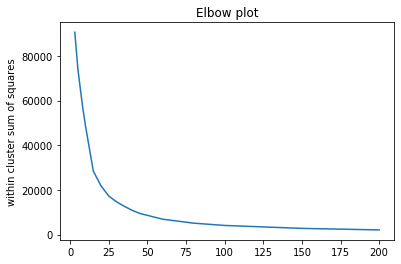

In [148]:
#elbow plot
plt.plot(clusters,inertias)
plt.title('Elbow plot')
plt.ylabel('within cluster sum of squares')

In [149]:

#optimal number of clusters is around 40
cl = KMeans(40)
cl.fit(results)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:

#outlier removal


def remove_outliers(results, cl, threshold):
    '''
    returns subset of results, and associated labels as a tuple
    takes results and a fit KMeans cluster object'''
    
    new_labels = []
    new_results = []
    
    
    #code for deciding what clusters to keep
    for i, center in enumerate(cl.cluster_centers_):
        within_cluster_results = results[cl.labels_==i]
        centroid = cl.cluster_centers_[i]
        #calc std vectors
        stdev = np.std(within_cluster_results, axis=0)
       
        keep = np.linalg.norm((centroid - within_cluster_results), axis=1) < threshold*np.linalg.norm(stdev)
        new_results.append(within_cluster_results[keep])
        #add labels?
        new_labels.extend([i for j in range(len(within_cluster_results[keep]))])
    return np.vstack(new_results), np.array(new_labels)

In [151]:

thresholds = np.linspace(.3,3, 20)

test = [remove_outliers(results, cl,t) for t in thresholds]

scores= []
for (res, labels) in test:
    
    score = ch_score(res, labels)
    scores.append(score)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

Text(0.5, 1.0, 'Calinski Harabaz Scores as std threshold changes')

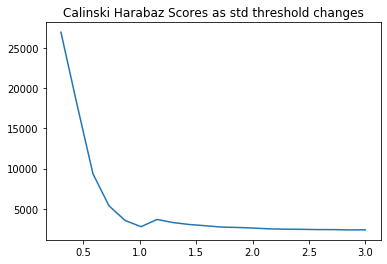

In [152]:
plt.plot(thresholds, scores)
plt.title('Calinski Harabaz Scores as std threshold changes')

In [0]:
#empirical best threshold 1 stdev
newresults, labels = remove_outliers(results, cl,1)

In [0]:

def sil_scores(X, range_n_clusters ):
    result = []
    for n_clusters in range_n_clusters:
    #     X=data
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init=20, max_iter=500)
        cluster_labels = clusterer.fit_predict(X)



        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
        result.append(silhouette_avg)
    return result

def silhouette_plotter(X, range_n_clusters, tsne_X ):
    all_scores = []
    for n_clusters in range_n_clusters:
    #     X=data
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)



        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        all_scores.append(silhouette_avg)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)


        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / 8)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / 8)
        ax2.scatter(tsne_X[:, 0], tsne_X[:, 1], marker='.', s=30, lw=0, alpha=1,
                    c=colors, edgecolor='k')

            

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        #ax2.set_yscale('log')
        #ax2.set_xscale('log')
        #ax2.set_xlim(.0001,1000)
        #ax2.set_ylim(.0001,1000)
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()
    return all_scores

In [166]:
X=results
range_n_clusters = [20]
if len(newresults) <20000:
    silhouette_plotter(X, range_n_clusters)

TypeError: ignored

In [0]:
#subset results for tsne
max_size = 20000
subset_results = []
lbls = []
for c in np.unique(cl.labels_):
    mask = (cl.labels_==c)
    c_size = np.sum(mask)
    if c_size < max_size:
        lbls.extend(list(cl.labels_[cl.labels_==c]))
        subset_results.append(results[mask])
lbls=np.array(lbls)
subset_results=np.vstack(subset_results)

In [157]:

import time
from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000)
tsne_results = tsne.fit_transform(subset_results)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 6742 samples in 0.021s...
[t-SNE] Computed neighbors for 6742 samples in 0.671s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6742
[t-SNE] Computed conditional probabilities for sample 2000 / 6742
[t-SNE] Computed conditional probabilities for sample 3000 / 6742
[t-SNE] Computed conditional probabilities for sample 4000 / 6742
[t-SNE] Computed conditional probabilities for sample 5000 / 6742
[t-SNE] Computed conditional probabilities for sample 6000 / 6742
[t-SNE] Computed conditional probabilities for sample 6742 / 6742
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.361519
[t-SNE] KL divergence after 1000 iterations: 0.712318
t-SNE done! Time elapsed: 50.57222270965576 seconds


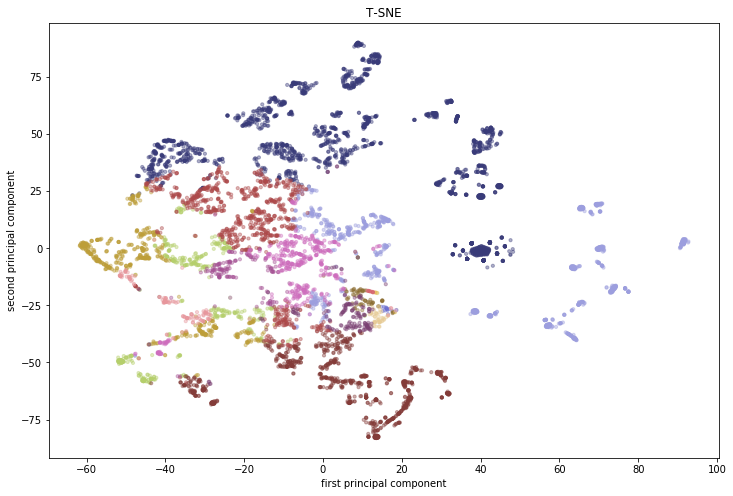

In [158]:
plt.figure(figsize=(12,8))

plt.scatter(tsne_results[:,0], tsne_results[:,1], s=10,c=lbls,cmap='tab20b', alpha=.4)


# leg = plt.legend()




# for lh in leg.legendHandles: 
#     lh.set_alpha(1)
plt.title('T-SNE')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.show()

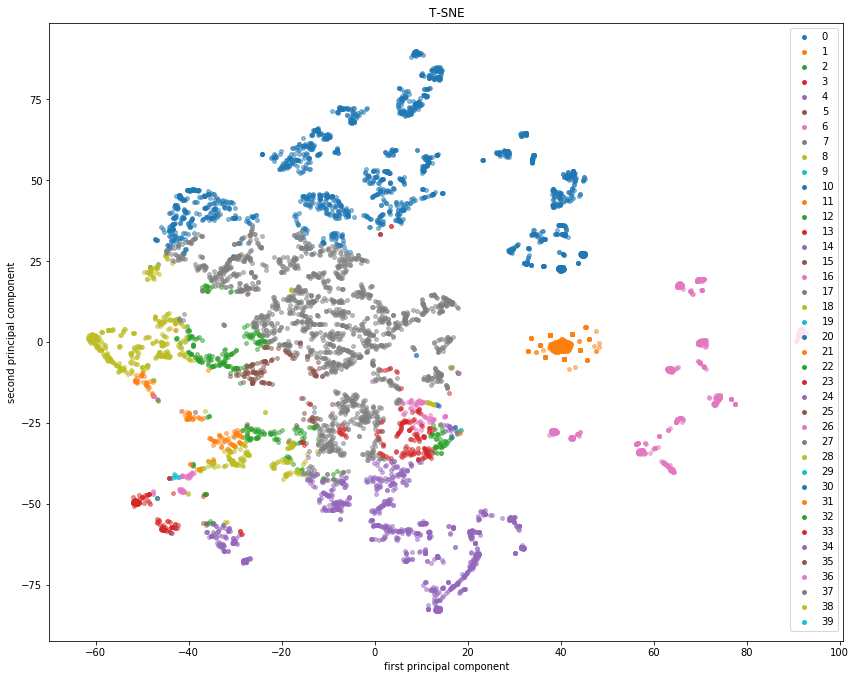

In [159]:

plt.figure(figsize=(12,10))
for c in np.unique(lbls):
    mask = lbls==c
    if np.sum(mask) <0:
        lbl = '_nolegend_'
    else:
        lbl = c
    plt.scatter(tsne_results[mask][:,0], tsne_results[mask][:,1], s=15,alpha=.5,label=lbl)
leg = plt.legend()
for lh in leg.legendHandles: 
    lh.set_alpha(1)
plt.title('T-SNE')
plt.xlabel('first principal component')
plt.ylabel('second principal component')
plt.tight_layout()